In [1]:
# importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import copy
import random
import pandas as pd
import math
import scipy
from scipy.stats import norm, expon
from scipy.linalg import null_space
import pandas as pd
import matplotlib as mpl
import os
cwd = os.getcwd()

%run ../functions_MCMC

In [5]:
# define variables
data_seed = 1223
burnin = 1000 #1k
n_after_burnin = 10000 #10k
delta_t = 0.3

#T=60 gives 200 delta_y
T = 60
n_it = 1
seeds_list = [1229, 1231, 1237, 1249, 1259, 1277, 1279, 1283, 1289, 1291]
n_sim = 100

V_F = 2000
V_B = -1500
V = np.array([V_F, V_B])
Lambda = np.array([1, 0.5])
log_Lambda = np.log(Lambda)
P = np.array([[0.0, 1.0], [1.0, 0.0]])
sigma = 50.0
sigma_max = np.max(np.abs(V))*delta_t/10.0
n = Lambda.shape[0]
n_param = 5

parameter_names = ['v1', 'v2', 'loglambda1', 'loglambda2', 'sigma']
parameter_names_tex = [r'$v_1$', r'$v_2$', r'log($\lambda_1$)',
                       r'log($\lambda_2$)', r'$\sigma$']

#choose initial covariance matrix for resampling
init_cov_matrix = np.diag(np.array([0.1, 0.1, 0.0001, 0.0001, 0.01]))

correlated = False
up_to_switches = 1

theta_true = list(V) + list(log_Lambda) + [sigma] #not including values for P for 2x2

In [6]:
#THIS STILL NEEDS TO BE MODIFIED FOR SEVERAL CASES
def get_parameters(theta):
    V = np.zeros(2)
    V[0] = 1.0*theta[0]
    V[1] = 1.0*theta[1]
    Lambda = 1.0*np.exp(np.array(theta[2:4]))
    P = np.zeros((2,2))
    P[0,1] = 1.0
    P[1,0] = 1.0
    sigma = 1.0*theta[-1]
    
    return V, Lambda, P, sigma

In [7]:
#importing the results of the inference
#generated in each folder running 
theta_all = {'ratesx1':[[] for _ in range(100)],
             'ratesx2':[[] for _ in range(100)],
             'ratesx4':[[] for _ in range(100)],
             'ratesx8':[[] for _ in range(100)],
             'ratesx16':[[] for _ in range(100)]}

log_pi = {'ratesx1':[None for _ in range(100)],
          'ratesx2':[None for _ in range(100)],
          'ratesx4':[None for _ in range(100)],
          'ratesx8':[None for _ in range(100)],
          'ratesx16':[None for _ in range(100)]}

theta_best = {'ratesx1':[None for _ in range(100)],
              'ratesx2':[None for _ in range(100)],
              'ratesx4':[None for _ in range(100)],
              'ratesx8':[None for _ in range(100)],
              'ratesx16':[None for _ in range(100)]}

list_1 = ['ratesx1', 'ratesx2', 'ratesx4', 'ratesx8', 'ratesx16']
list_2 = [1, 2, 4, 8, 16]

theta_all_NOTtrack = {'ratesx1':[[] for _ in range(100)],
                      'ratesx2':[[] for _ in range(100)],
                      'ratesx4':[[] for _ in range(100)],
                      'ratesx8':[[] for _ in range(100)],
                      'ratesx16':[[] for _ in range(100)]}

log_pi_NOTtrack = {'ratesx1':[None for _ in range(100)],
                   'ratesx2':[None for _ in range(100)],
                   'ratesx4':[None for _ in range(100)],
                   'ratesx8':[None for _ in range(100)],
                   'ratesx16':[None for _ in range(100)]}

theta_best_NOTtrack = {'ratesx1':[None for _ in range(100)],
                       'ratesx2':[None for _ in range(100)],
                       'ratesx4':[None for _ in range(100)],
                       'ratesx8':[None for _ in range(100)],
                       'ratesx16':[None for _ in range(100)]}

for el in list_1:
    print("Importing theta - folder", el, "seed")
    for seed in range(100):
        print(seed)
        for param in parameter_names:
            theta_all[el][seed] += [np.array(pd.read_csv("RESULTS_2_"+el+"/MCMC, seed "+str(seed)+", parameter "+param+", burnin=10000, n_after_burnin=10000", index_col=0)).flatten()]
            theta_all_NOTtrack[el][seed] += [np.array(pd.read_csv("RESULTS_2_"+el+"_NOTtrack/MCMC, seed "+str(seed)+", parameter "+param+", burnin=10000, n_after_burnin=10000", index_col=0)).flatten()]
        theta_all[el][seed] = np.array(theta_all[el][seed])
        theta_all_NOTtrack[el][seed] = np.array(theta_all_NOTtrack[el][seed])

        log_pi[el][seed] = np.array(pd.read_csv("RESULTS_2_"+el+"/MCMC, seed "+str(seed)+", log_pi , burnin=10000, n_after_burnin=10000", index_col=0)).flatten()
        theta_best[el][seed] = theta_all[el][seed][:, np.argmax(log_pi[el][seed])]

        log_pi_NOTtrack[el][seed] = np.array(pd.read_csv("RESULTS_2_"+el+"_NOTtrack/MCMC, seed "+str(seed)+", log_pi , burnin=10000, n_after_burnin=10000", index_col=0)).flatten()
        theta_best_NOTtrack[el][seed] = theta_all_NOTtrack[el][seed][:, np.argmax(log_pi_NOTtrack[el][seed])]

Importing theta - folder ratesx1 seed
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Importing theta - folder ratesx2 seed
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Importing theta - folder ratesx4 seed
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Importing theta 

In [20]:
#computing means and standard deviations
mean_corr = {1:[], 2:[], 4:[], 8:[], 16:[]}
std_corr = {1:[], 2:[], 4:[], 8:[], 16:[]}
mean_corr_NOTtrack = {1:[], 2:[], 4:[], 8:[], 16:[]}
std_corr_NOTtrack = {1:[], 2:[], 4:[], 8:[], 16:[]}

for i in range(5):
    mean_corr[list_2[i]] = np.mean(np.array([theta_best[list_1[i]][seed]
                                             for seed in range(100)]), axis=0)
    mean_corr_NOTtrack[list_2[i]] = np.mean(np.array([theta_best_NOTtrack[list_1[i]][seed]
                                             for seed in range(100)]), axis=0)
    std_corr[list_2[i]] = np.std(np.array([theta_best[list_1[i]][seed]
                                             for seed in range(100)]), axis=0)
    std_corr_NOTtrack[list_2[i]] = np.std(np.array([theta_best_NOTtrack[list_1[i]][seed]
                                             for seed in range(100)]), axis=0)

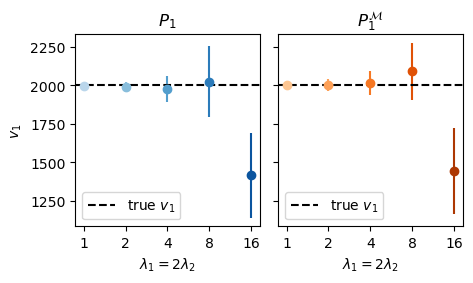

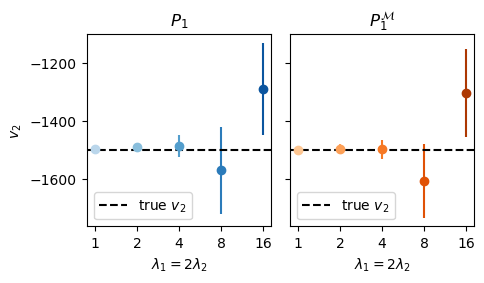

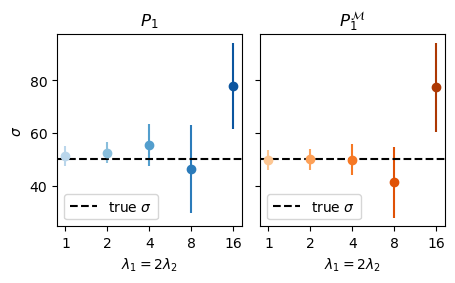

In [21]:
#Figure S4 panels A, B, E
colors_track = mpl.colormaps['Blues'](np.linspace(0, 1, 8))[2:7]
colors_NOTtrack = mpl.colormaps['Oranges'](np.linspace(0, 1, 8))[2:7]

x = np.arange(6)
for j in [0,1,4]:
    fig, ax = plt.subplots(1,2, figsize=(5.0,2.5), sharex=True, sharey=True)
    for ind in np.arange(5):
        i = [1,2,4,8,16][ind]
        #print(mean[i][j])
        #print(std[i][j])
        ax[0].errorbar(ind, mean_corr[i][j], yerr=std_corr[i][j], color=colors_track[ind], fmt='-o')
        ax[1].errorbar(ind, mean_corr_NOTtrack[i][j], yerr=std_corr_NOTtrack[i][j], color=colors_NOTtrack[ind], fmt='-o')
    for ind2 in range(2):
        ax[ind2].axhline(theta_true[j], linestyle='--', color='black',
                  label='true '+parameter_names_tex[j])
        ax[ind2].legend(loc='lower left')
        ax[ind2].set_xticks(ticks=np.arange(5), labels=[1,2,4,8,16])
    ax[0].set_ylabel(parameter_names_tex[j])
    ax[0].set_title(r'$P_1$')
    ax[1].set_title(r'$P_1^{\mathcal{M}}$')
    ax[0].set_xlabel(r'$\lambda_1=2\lambda_2$')
    ax[1].set_xlabel(r'$\lambda_1=2\lambda_2$')
    plt.subplots_adjust(wspace=0.1)
    plt.savefig("mean_std_track_vs_NOTtrack_"+parameter_names[j]+".png", format="png", dpi=1200,
                bbox_inches="tight")
    plt.show()

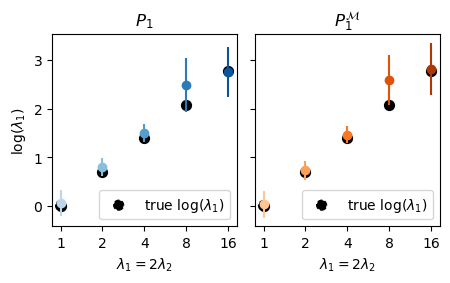

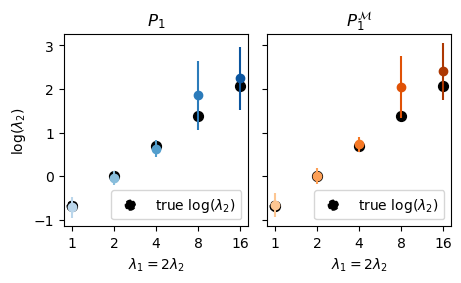

In [22]:
#Figure S4 panels C, D
colors_track = mpl.colormaps['Blues'](np.linspace(0, 1, 8))[2:7]
colors_NOTtrack = mpl.colormaps['Oranges'](np.linspace(0, 1, 8))[2:7]

x = np.arange(6)
for j in [2,3]:
    fig, ax = plt.subplots(1,2, figsize=(5.0,2.5), sharex=True, sharey=True)
    ax[1].scatter(0, theta_true[j]+np.log(1), linestyle='--', color='black',
                  label='true '+parameter_names_tex[j], s=50)
    ax[0].scatter(0, theta_true[j]+np.log(1), linestyle='--', color='black',
                  label='true '+parameter_names_tex[j], s=50)
    for ind in np.arange(5):
        i = [1,2,4,8,16][ind]
        #print(mean[i][j])
        #print(std[i][j])
        ax[1].scatter(ind, theta_true[j]+np.log(i), color='black', s=50)
        ax[0].scatter(ind, theta_true[j]+np.log(i), color='black', s=50)
        ax[0].errorbar(ind, mean_corr[i][j], yerr=std_corr[i][j], color=colors_track[ind], fmt='-o')
        ax[1].errorbar(ind, mean_corr_NOTtrack[i][j], yerr=std_corr_NOTtrack[i][j], color=colors_NOTtrack[ind], fmt='-o')
    for ind2 in range(2):
        ax[ind2].legend(loc='lower right')
        ax[ind2].set_xticks(ticks=np.arange(5), labels=[1,2,4,8,16])
    ax[0].set_ylabel(parameter_names_tex[j])
    ax[0].set_title(r'$P_1$')
    ax[1].set_title(r'$P_1^{\mathcal{M}}$')
    ax[0].set_xlabel(r'$\lambda_1=2\lambda_2$')
    ax[1].set_xlabel(r'$\lambda_1=2\lambda_2$')
    plt.subplots_adjust(wspace=0.1)
    plt.savefig("mean_std_track_vs_NOTtrack_"+parameter_names[j]+".png", format="png", dpi=1200,
                bbox_inches="tight")
    plt.show()